In [ ]:
pip install catboost

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
plt.style.use(['fivethirtyeight'])

%matplotlib inline

#EDA

# Profile 기능을 사용하기 위한 모듈입니다.
# pip install pandas-profiling
#from pandas_profiling import ProfileReport

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


import klib

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm
from sklearn.ensemble import VotingClassifier

from catboost import CatBoostClassifier
from sklearn.base import ClassifierMixin
from sklearn.ensemble import StackingClassifier

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

In [2]:
path = "/usr/local/share/fonts"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Ubuntu':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)

Unknown system...


# 1 **EDA**


In [3]:
train = pd.read_csv(r'/home/ubuntu/바탕화면/Desktop/X_train.csv', encoding='cp949')

test = pd.read_csv(r'/home/ubuntu/바탕화면/Desktop/X_test.csv', encoding='cp949')

y_train = pd.read_csv(r'/home/ubuntu/바탕화면/y_train.csv').gender

train_id = train['cust_id']
test_id = test['cust_id']

features = pd.concat([train, test]).reset_index(drop=True)

In [4]:
test_id

0       3500
1       3501
2       3502
3       3503
4       3504
        ... 
2477    5977
2478    5978
2479    5979
2480    5980
2481    5981
Name: cust_id, Length: 2482, dtype: int64

In [5]:
# 데이터 분석을 위한 데이터 Copy

In [6]:
y_train_normalized = y_train.copy(deep=True)

In [7]:
y_train_stand= y_train.copy(deep=True)

In [8]:
y_train_po= y_train.copy(deep=True)

In [9]:
## profile function은 주석 제거하면 돌아감.
# profile = ProfileReport(tr, title='Pandas Profiling Report')

In [10]:
# profile

# 2.  **Data cleansing and Feature Enginering**


In [11]:
features.dtypes

cust_id                      int64
총구매액                         int64
구매건수                         int64
손질평균구매액                      int64
최저구매액                        int64
최대구매액                        int64
월                            int64
일                            int64
최대제품                        object
휴면_여부                        int64
평일방문비율                     float64
Top-10 베스트 셀러에 대한 구매 금액    float64
Top-10 베스트 셀러에 대한 구매 건수    float64
dtype: object

In [12]:
features1 = features.copy(deep=True)
features1

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840,74,606119,-5368000,11264000,12,30,화장품,7,0.527027,45689940.0,51.0
1,1,2136000,3,712000,-300000,2136000,10,25,트래디셔널,67,0.000000,NaN,NaN
2,2,3197000,4,799250,64500,1639000,1,10,남성 캐주얼,355,0.000000,139000.0,2.0
3,3,16077620,44,121837,1800,4935000,12,31,캐주얼,17,0.318182,4411020.0,36.0
4,4,29050000,3,9683333,2050000,24000000,11,28,화장품,47,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,12,14,피혁잡화,30,0.642857,25948000.0,4.0
5978,5978,480000,1,480000,480000,480000,1,22,섬유잡화,343,0.000000,NaN,NaN
5979,5979,260003790,71,2506764,1250,25750000,12,30,피혁잡화,1,0.915493,4188350.0,10.0
5980,5980,88991520,18,4401970,440000,18120000,12,14,침구/수예,23,0.444444,51869020.0,12.0


In [13]:
features_norm = features1.copy(deep=True)

In [14]:
features_stand = features1.copy(deep=True)

In [15]:
features_po = features1.copy(deep=True)

In [16]:
cat_features = list(features1.select_dtypes(include=['object']).columns)
num_features = [c for c in features1.iloc[:,1:].columns.tolist() if c not in cat_features]

In [17]:
features1[num_features] = SimpleImputer(strategy='constant', fill_value=0).fit_transform(features1[num_features])
features1[cat_features] = SimpleImputer(strategy="most_frequent").fit_transform(features1[cat_features])

### Outliers

In [18]:
features1[num_features] = features1[num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)
features1

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840.0,74.0,606119.0,-5368000.0,11264000.0,12.0,30.0,화장품,7.0,0.527027,45689940.0,51.0
1,1,2136000.0,3.0,712000.0,-300000.0,2136000.0,10.0,25.0,트래디셔널,67.0,0.000000,0.0,0.0
2,2,3197000.0,4.0,799250.0,64500.0,1639000.0,2.0,10.0,남성 캐주얼,314.0,0.000000,139000.0,2.0
3,3,16077620.0,44.0,121837.0,1800.0,4935000.0,12.0,31.0,캐주얼,17.0,0.318182,4411020.0,36.0
4,4,29050000.0,3.0,6876072.8,2050000.0,24000000.0,11.0,28.0,화장품,47.0,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500.0,14.0,4850042.0,405000.0,23976000.0,12.0,14.0,피혁잡화,30.0,0.642857,25948000.0,4.0
5978,5978,480000.0,1.0,480000.0,480000.0,480000.0,2.0,22.0,섬유잡화,314.0,0.000000,0.0,0.0
5979,5979,260003790.0,71.0,2506764.0,1250.0,25750000.0,12.0,30.0,피혁잡화,1.0,0.915493,4188350.0,10.0
5980,5980,88991520.0,18.0,4401970.0,440000.0,18120000.0,12.0,14.0,침구/수예,23.0,0.444444,51869020.0,12.0


### Missing values

#우리는 0으로 채운다 왜냐하면 그것은 화장이 없다는 것을 의미하기 때문이다.

In [19]:
features1.isnull().sum()

cust_id                    0
총구매액                       0
구매건수                       0
손질평균구매액                    0
최저구매액                      0
최대구매액                      0
월                          0
일                          0
최대제품                       0
휴면_여부                      0
평일방문비율                     0
Top-10 베스트 셀러에 대한 구매 금액    0
Top-10 베스트 셀러에 대한 구매 건수    0
dtype: int64

In [20]:
features1.fillna(0)

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840.0,74.0,606119.0,-5368000.0,11264000.0,12.0,30.0,화장품,7.0,0.527027,45689940.0,51.0
1,1,2136000.0,3.0,712000.0,-300000.0,2136000.0,10.0,25.0,트래디셔널,67.0,0.000000,0.0,0.0
2,2,3197000.0,4.0,799250.0,64500.0,1639000.0,2.0,10.0,남성 캐주얼,314.0,0.000000,139000.0,2.0
3,3,16077620.0,44.0,121837.0,1800.0,4935000.0,12.0,31.0,캐주얼,17.0,0.318182,4411020.0,36.0
4,4,29050000.0,3.0,6876072.8,2050000.0,24000000.0,11.0,28.0,화장품,47.0,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500.0,14.0,4850042.0,405000.0,23976000.0,12.0,14.0,피혁잡화,30.0,0.642857,25948000.0,4.0
5978,5978,480000.0,1.0,480000.0,480000.0,480000.0,2.0,22.0,섬유잡화,314.0,0.000000,0.0,0.0
5979,5979,260003790.0,71.0,2506764.0,1250.0,25750000.0,12.0,30.0,피혁잡화,1.0,0.915493,4188350.0,10.0
5980,5980,88991520.0,18.0,4401970.0,440000.0,18120000.0,12.0,14.0,침구/수예,23.0,0.444444,51869020.0,12.0


### Transform Features

#### A. Min-Max

In [21]:
features_norm

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840,74,606119,-5368000,11264000,12,30,화장품,7,0.527027,45689940.0,51.0
1,1,2136000,3,712000,-300000,2136000,10,25,트래디셔널,67,0.000000,NaN,NaN
2,2,3197000,4,799250,64500,1639000,1,10,남성 캐주얼,355,0.000000,139000.0,2.0
3,3,16077620,44,121837,1800,4935000,12,31,캐주얼,17,0.318182,4411020.0,36.0
4,4,29050000,3,9683333,2050000,24000000,11,28,화장품,47,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,12,14,피혁잡화,30,0.642857,25948000.0,4.0
5978,5978,480000,1,480000,480000,480000,1,22,섬유잡화,343,0.000000,NaN,NaN
5979,5979,260003790,71,2506764,1250,25750000,12,30,피혁잡화,1,0.915493,4188350.0,10.0
5980,5980,88991520,18,4401970,440000,18120000,12,14,침구/수예,23,0.444444,51869020.0,12.0


In [22]:
cat_features_norm = list(features_norm.select_dtypes(include=['object']).columns)
num_features_norm = [c for c in features_norm.iloc[:,1:].columns.tolist() if c not in cat_features_norm]

# 결측값 처리
features_norm[cat_features_norm] = features_norm[cat_features_norm].fillna('None')
features_norm[num_features_norm] = features_norm[num_features_norm].fillna(0)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_norm[num_features_norm]= scaler.fit(features_norm[num_features_norm]).transform(features_norm[num_features_norm])
features_norm

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,0.041427,0.039247,0.198633,0.648051,0.065456,1.000000,0.966667,화장품,0.019284,0.527027,0.058379,0.036455
1,1,0.018725,0.001075,0.199186,0.659236,0.053189,0.818182,0.800000,트래디셔널,0.184573,0.000000,0.036590,0.000000
2,2,0.019089,0.001613,0.199641,0.660041,0.052521,0.000000,0.300000,남성 캐주얼,0.977961,0.000000,0.036656,0.001430
3,3,0.023510,0.023118,0.196104,0.659902,0.056950,1.000000,1.000000,캐주얼,0.046832,0.318182,0.038693,0.025733
4,4,0.027962,0.001075,0.246023,0.664423,0.082573,0.909091,0.900000,화장품,0.129477,0.000000,0.038998,0.001430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.046335,0.006989,0.220790,0.660792,0.082541,1.000000,0.433333,피혁잡화,0.082645,0.642857,0.048964,0.002859
5978,5978,0.018156,0.000000,0.197974,0.660958,0.050963,0.000000,0.700000,섬유잡화,0.944904,0.000000,0.036590,0.000000
5979,5979,0.107228,0.037634,0.208556,0.659901,0.084925,1.000000,0.966667,피혁잡화,0.002755,0.915493,0.038587,0.007148
5980,5980,0.048535,0.009140,0.218450,0.660870,0.074670,1.000000,0.433333,침구/수예,0.063361,0.444444,0.061326,0.008578


#### B. Standarization

In [24]:
features_stand

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840,74,606119,-5368000,11264000,12,30,화장품,7,0.527027,45689940.0,51.0
1,1,2136000,3,712000,-300000,2136000,10,25,트래디셔널,67,0.000000,NaN,NaN
2,2,3197000,4,799250,64500,1639000,1,10,남성 캐주얼,355,0.000000,139000.0,2.0
3,3,16077620,44,121837,1800,4935000,12,31,캐주얼,17,0.318182,4411020.0,36.0
4,4,29050000,3,9683333,2050000,24000000,11,28,화장품,47,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,12,14,피혁잡화,30,0.642857,25948000.0,4.0
5978,5978,480000,1,480000,480000,480000,1,22,섬유잡화,343,0.000000,NaN,NaN
5979,5979,260003790,71,2506764,1250,25750000,12,30,피혁잡화,1,0.915493,4188350.0,10.0
5980,5980,88991520,18,4401970,440000,18120000,12,14,침구/수예,23,0.444444,51869020.0,12.0


In [25]:
cat_features_stand = list(features_stand.select_dtypes(include=['object']).columns)
num_features_stand = [c for c in features_stand.iloc[:,1:].columns.tolist() if c not in cat_features_stand]

# 결측값 처리
features_stand[cat_features_stand] = features_stand[cat_features_stand].fillna('None')
features_stand[num_features_stand] = features_stand[num_features_stand].fillna(0)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_stand[num_features_stand]= scaler.fit_transform(features_stand[num_features_stand])

#### C. Power Transformation

In [27]:
features_po

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,68282840,74,606119,-5368000,11264000,12,30,화장품,7,0.527027,45689940.0,51.0
1,1,2136000,3,712000,-300000,2136000,10,25,트래디셔널,67,0.000000,NaN,NaN
2,2,3197000,4,799250,64500,1639000,1,10,남성 캐주얼,355,0.000000,139000.0,2.0
3,3,16077620,44,121837,1800,4935000,12,31,캐주얼,17,0.318182,4411020.0,36.0
4,4,29050000,3,9683333,2050000,24000000,11,28,화장품,47,0.000000,5050000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500,14,4850042,405000,23976000,12,14,피혁잡화,30,0.642857,25948000.0,4.0
5978,5978,480000,1,480000,480000,480000,1,22,섬유잡화,343,0.000000,NaN,NaN
5979,5979,260003790,71,2506764,1250,25750000,12,30,피혁잡화,1,0.915493,4188350.0,10.0
5980,5980,88991520,18,4401970,440000,18120000,12,14,침구/수예,23,0.444444,51869020.0,12.0


In [28]:
cat_features_po = list(features_po.select_dtypes(include=['object']).columns)
num_features_po = [c for c in features_po.iloc[:,1:].columns.tolist() if c not in cat_features_po]

# 결측값 처리
features_po[cat_features_po] = features_po[cat_features_po].fillna('None')
features_po[num_features_po] = features_po[num_features_po].fillna(0)

In [29]:
features_po[num_features_po] = PowerTransformer(standardize=True).fit_transform(features_po[num_features_po])
features_po

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,최대제품,휴면_여부,평일방문비율,Top-10 베스트 셀러에 대한 구매 금액,Top-10 베스트 셀러에 대한 구매 건수
0,0,-0.110976,0.804008,-0.275003,-0.171185,-0.258822,0.778506,0.754144,화장품,-0.818197,0.961537,0.064857,0.828233
1,1,-0.596534,-1.104686,-0.251385,0.087399,-0.580104,-0.216884,-0.219687,트래디셔널,0.464974,-1.318162,-0.464203,-1.655025
2,2,-0.586490,-0.949782,-0.232015,0.113480,-0.599367,-1.882623,-1.763712,남성 캐주얼,1.602446,-1.318162,-0.461440,-0.918535
3,3,-0.479468,0.490343,-0.385644,0.104901,-0.476857,0.778506,0.980771,캐주얼,-0.355080,0.328410,-0.400682,0.631718
4,4,-0.382128,-1.104686,1.621706,0.425279,0.152550,0.243860,0.333315,화장품,0.242429,-1.318162,-0.392393,-0.918535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,-0.017082,-0.210795,0.629874,0.164074,0.151796,0.778506,-1.527624,피혁잡화,-0.029135,1.227595,-0.147461,-0.588599
5978,5978,-0.613626,-1.596551,-0.303329,0.175548,-0.646699,-1.882623,-0.683491,섬유잡화,1.577484,-1.318162,-0.464203,-1.655025
5979,5979,1.054304,0.779223,0.137434,0.104833,0.207385,0.778506,0.754144,피혁잡화,-1.549883,1.699113,-0.403597,-0.094372
5980,5980,0.024417,-0.056803,0.536522,0.169419,-0.034291,0.778506,-1.527624,침구/수예,-0.184180,0.738583,0.129344,0.008053


### Dummies

In [30]:
features1 = pd.get_dummies(features1)
features1

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,휴면_여부,평일방문비율,...,최대제품_준보석/시계,최대제품_차/커피,최대제품_축산가공,최대제품_침구/수예,최대제품_캐주얼,최대제품_커리어,최대제품_통신/컴퓨터,최대제품_트래디셔널,최대제품_피혁잡화,최대제품_화장품
0,0,68282840.0,74.0,606119.0,-5368000.0,11264000.0,12.0,30.0,7.0,0.527027,...,0,0,0,0,0,0,0,0,0,1
1,1,2136000.0,3.0,712000.0,-300000.0,2136000.0,10.0,25.0,67.0,0.000000,...,0,0,0,0,0,0,0,1,0,0
2,2,3197000.0,4.0,799250.0,64500.0,1639000.0,2.0,10.0,314.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,3,16077620.0,44.0,121837.0,1800.0,4935000.0,12.0,31.0,17.0,0.318182,...,0,0,0,0,1,0,0,0,0,0
4,4,29050000.0,3.0,6876072.8,2050000.0,24000000.0,11.0,28.0,47.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,82581500.0,14.0,4850042.0,405000.0,23976000.0,12.0,14.0,30.0,0.642857,...,0,0,0,0,0,0,0,0,1,0
5978,5978,480000.0,1.0,480000.0,480000.0,480000.0,2.0,22.0,314.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
5979,5979,260003790.0,71.0,2506764.0,1250.0,25750000.0,12.0,30.0,1.0,0.915493,...,0,0,0,0,0,0,0,0,1,0
5980,5980,88991520.0,18.0,4401970.0,440000.0,18120000.0,12.0,14.0,23.0,0.444444,...,0,0,0,1,0,0,0,0,0,0


In [31]:
features_norm = pd.get_dummies(features_norm)
features_norm

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,휴면_여부,평일방문비율,...,최대제품_준보석/시계,최대제품_차/커피,최대제품_축산가공,최대제품_침구/수예,최대제품_캐주얼,최대제품_커리어,최대제품_통신/컴퓨터,최대제품_트래디셔널,최대제품_피혁잡화,최대제품_화장품
0,0,0.041427,0.039247,0.198633,0.648051,0.065456,1.000000,0.966667,0.019284,0.527027,...,0,0,0,0,0,0,0,0,0,1
1,1,0.018725,0.001075,0.199186,0.659236,0.053189,0.818182,0.800000,0.184573,0.000000,...,0,0,0,0,0,0,0,1,0,0
2,2,0.019089,0.001613,0.199641,0.660041,0.052521,0.000000,0.300000,0.977961,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,3,0.023510,0.023118,0.196104,0.659902,0.056950,1.000000,1.000000,0.046832,0.318182,...,0,0,0,0,1,0,0,0,0,0
4,4,0.027962,0.001075,0.246023,0.664423,0.082573,0.909091,0.900000,0.129477,0.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.046335,0.006989,0.220790,0.660792,0.082541,1.000000,0.433333,0.082645,0.642857,...,0,0,0,0,0,0,0,0,1,0
5978,5978,0.018156,0.000000,0.197974,0.660958,0.050963,0.000000,0.700000,0.944904,0.000000,...,0,0,0,0,0,0,0,0,0,0
5979,5979,0.107228,0.037634,0.208556,0.659901,0.084925,1.000000,0.966667,0.002755,0.915493,...,0,0,0,0,0,0,0,0,1,0
5980,5980,0.048535,0.009140,0.218450,0.660870,0.074670,1.000000,0.433333,0.063361,0.444444,...,0,0,0,1,0,0,0,0,0,0


In [32]:
features_stand = pd.get_dummies(features_stand)
features_stand

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,휴면_여부,평일방문비율,...,최대제품_준보석/시계,최대제품_차/커피,최대제품_축산가공,최대제품_침구/수예,최대제품_캐주얼,최대제품_커리어,최대제품_통신/컴퓨터,최대제품_트래디셔널,최대제품_피혁잡화,최대제품_화장품
0,0,-0.163544,0.063780,-0.278528,-0.109259,-0.278459,0.681511,0.682476,-0.724781,0.785662,...,0,0,0,0,0,0,0,0,0,1
1,1,-0.558135,-0.511281,-0.256451,0.225235,-0.552530,0.087918,0.045192,-0.152232,-1.051729,...,0,0,0,0,0,0,0,1,0,0
2,2,-0.551806,-0.503181,-0.238259,0.249292,-0.567452,-2.583254,-1.866661,2.596005,-1.051729,...,0,0,0,0,0,0,0,0,0,0
3,3,-0.474968,-0.179203,-0.379503,0.245154,-0.468489,0.681511,0.809932,-0.629356,0.057558,...,0,0,0,0,1,0,0,0,0,0
4,4,-0.397583,-0.511281,1.614108,0.380338,0.103943,0.384715,0.427562,-0.343081,-1.051729,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,-0.078247,-0.422187,0.606347,0.271766,0.103223,0.681511,-1.356833,-0.505304,1.189484,...,0,0,0,0,0,0,0,0,1,0
5978,5978,-0.568014,-0.527479,-0.304824,0.276716,-0.602251,-2.583254,-0.337179,2.481495,-1.051729,...,0,0,0,0,0,0,0,0,0,0
5979,5979,0.980144,0.039482,0.117764,0.245118,0.156487,0.681511,0.682476,-0.782036,2.139983,...,0,0,0,0,0,0,0,0,1,0
5980,5980,-0.040009,-0.389789,0.512922,0.274076,-0.072605,0.681511,-1.356833,-0.572101,0.497751,...,0,0,0,1,0,0,0,0,0,0


In [33]:
features_po = pd.get_dummies(features_po)
features_po

,cust_id,총구매액,구매건수,손질평균구매액,최저구매액,최대구매액,월,일,휴면_여부,평일방문비율,...,최대제품_준보석/시계,최대제품_차/커피,최대제품_축산가공,최대제품_침구/수예,최대제품_캐주얼,최대제품_커리어,최대제품_통신/컴퓨터,최대제품_트래디셔널,최대제품_피혁잡화,최대제품_화장품
0,0,-0.110976,0.804008,-0.275003,-0.171185,-0.258822,0.778506,0.754144,-0.818197,0.961537,...,0,0,0,0,0,0,0,0,0,1
1,1,-0.596534,-1.104686,-0.251385,0.087399,-0.580104,-0.216884,-0.219687,0.464974,-1.318162,...,0,0,0,0,0,0,0,1,0,0
2,2,-0.586490,-0.949782,-0.232015,0.113480,-0.599367,-1.882623,-1.763712,1.602446,-1.318162,...,0,0,0,0,0,0,0,0,0,0
3,3,-0.479468,0.490343,-0.385644,0.104901,-0.476857,0.778506,0.980771,-0.355080,0.328410,...,0,0,0,0,1,0,0,0,0,0
4,4,-0.382128,-1.104686,1.621706,0.425279,0.152550,0.243860,0.333315,0.242429,-1.318162,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,-0.017082,-0.210795,0.629874,0.164074,0.151796,0.778506,-1.527624,-0.029135,1.227595,...,0,0,0,0,0,0,0,0,1,0
5978,5978,-0.613626,-1.596551,-0.303329,0.175548,-0.646699,-1.882623,-0.683491,1.577484,-1.318162,...,0,0,0,0,0,0,0,0,0,0
5979,5979,1.054304,0.779223,0.137434,0.104833,0.207385,0.778506,0.754144,-1.549883,1.699113,...,0,0,0,0,0,0,0,0,1,0
5980,5980,0.024417,-0.056803,0.536522,0.169419,-0.034291,0.778506,-1.527624,-0.184180,0.738583,...,0,0,0,1,0,0,0,0,0,0


## Features selection

Feature들 간의 scale크기가 달라서 크기를 조정하기 위해 정규화, 표준화, Power Transformation을 진행하였습니다.

### Normal data

100%|██████████| 95/95 [02:10<00:00,  1.37s/it]

(47, 0.711143419795879)


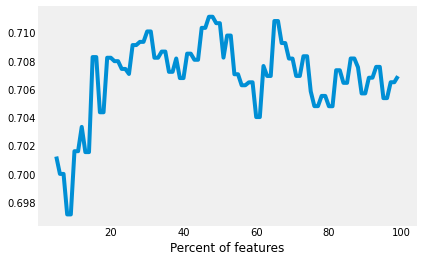

In [36]:
features1 = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), features1], axis=1)
X_train = features1.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test = features1.query('cust_id in @test_id').drop('cust_id', axis=1)

model = RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30)

cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, scoring='roc_auc', cv=5).mean()
    cv_scores.append((p,cv_score))

best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [37]:
fs = SelectPercentile(percentile=best_score[0]).fit(X_train, y_train)
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

### Normalized data 

100%|██████████| 95/95 [02:18<00:00,  1.46s/it]

(47, 0.7114637910703294)


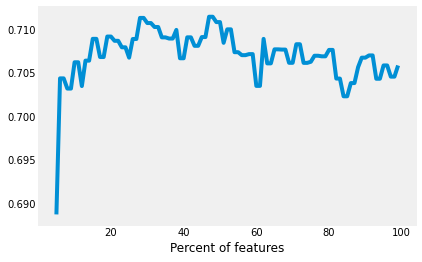

In [39]:
features_norm = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), features_norm], axis=1)
X_train_normalized = features_norm.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test_normalized = features_norm.query('cust_id in @test_id').drop('cust_id', axis=1)

model = RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30)

cv_scores_norm = []
for p in tqdm(range(5,100,1)):
    X_new_norm = SelectPercentile(percentile=p).fit_transform(X_train_normalized, y_train_normalized)    
    cv_score_norm = cross_val_score(model, X_new_norm, y_train_normalized, scoring='roc_auc', cv=5).mean()
    cv_scores_norm.append((p,cv_score_norm))

best_score_norm = cv_scores_norm[np.argmax([score for _, score in cv_scores_norm])]
print(best_score_norm)

plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores_norm])
plt.xlabel('Percent of features')
plt.grid()

In [41]:
fs_norm = SelectPercentile(percentile=best_score[0]).fit(X_train_normalized, y_train_normalized)
X_train_normalized = fs_norm.transform(X_train_norm)
X_test_normalized = fs_norm.transform(X_test_norm)

### Standarized data

In [ ]:
features_stand = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), features_stand], axis=1)
X_train_stand = features_stand.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test_stand = features_stand.query('cust_id in @test_id').drop('cust_id', axis=1)

model = RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30)

cv_scores_stand = []
for p in tqdm(range(5,100,1)):
    X_new_stand = SelectPercentile(percentile=p).fit_transform(X_train_stand, y_train_stand)    
    cv_score_stand = cross_val_score(model, X_new_stand, y_train_stand, scoring='roc_auc', cv=5).mean()
    cv_scores_stand.append((p,cv_score_stand))

best_score_stand = cv_scores_stand[np.argmax([score for _, score in cv_scores_stand])]
print(best_score_stand)

plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores_stand])
plt.xlabel('Percent of features')
plt.grid()

In [ ]:
fs_stand = SelectPercentile(percentile=best_score[0]).fit(X_train_stand, y_train_stand)
X_train_stand = fs_stand.transform(X_train_stand)
X_test_stand = fs_stand.transform(X_test_stand)

### Power transformation data

In [ ]:
features_po = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), features_po], axis=1)
X_train_po = features_po.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test_po = features_po.query('cust_id in @test_id').drop('cust_id', axis=1)

model = RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30)

cv_scores_po = []
for p in tqdm(range(5,100,1)):
    X_new_po = SelectPercentile(percentile=p).fit_transform(X_train_po, y_train_po)    
    cv_score_po = cross_val_score(model, X_new_po, y_train_po, scoring='roc_auc', cv=5).mean()
    cv_scores_po.append((p,cv_score_po))

best_score_po = cv_scores_po[np.argmax([score for _, score in cv_scores_po])]
print(best_score_po)

plt.plot([k for k, _ in cv_scores_po], [score for _, score in cv_scores_po])
plt.xlabel('Percent of features')
plt.grid()

In [ ]:
fs_po = SelectPercentile(percentile=best_score[0]).fit(X_train_po, y_train_po)
X_train_po = fs.transform(X_train_po)
X_test_po = fs.transform(X_test_po)

# 3. Model construction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [42]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_train_normalized, y_train_normalized, test_size=0.3, random_state=0)

In [ ]:
X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(X_train_stand, y_train_stand, test_size=0.3, random_state=0)

In [ ]:
X_train_po, X_test_po, y_train_po, y_test_po = train_test_split(X_train_po, y_train_po, test_size=0.3, random_state=0)

##### models assignment

In [43]:
clfs = [
    (
        KNeighborsClassifier(),              
        {'n_neighbors': [3,5,7,9,11],        
         'weights': ['uniform','distance']}
    ),
    (
        MLPClassifier(random_state=0),
        {'batch_size': ['auto', 32, 50, 64, 128],
         'learning_rate' : ['constant', 'adaptive'],
         'activation': ['tanh', 'relu'],
         'solver': ['sgd', 'adam']}
    ),
    (
        LogisticRegression(random_state=0),  
        {'C': np.arange(0.1, 1.1, 0.1),      
         'penalty': ['l1','l2']}
    ),
    (
        RandomForestClassifier(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [3,4,5],
         'max_features': (np.arange(0.5, 1.0, 0.1))}
    ),
    (
        GradientBoostingClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [0.01, 0.1, 1]}
    ),
    (
        AdaBoostClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01, 0.001],}
    ),    

     (
         CatBoostClassifier(random_seed=0, od_type="Iter", eval_metric = 'AUC'),
         {'iterations': [50, 100, 150, 200],
          'learning_rate': [1, 0.1, 0.01, 0.001],
          'depth': [3, 4, 5, 6],}
     ),     
]


##### defining a stratified cross validation

In [44]:
#"Stratified cross Validation"을 통해 우리는 더 나은 점수를 받는다.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stra = StratifiedKFold(n_splits = 9)

## Running the models

### Normal data

In [ ]:
clfs_tuned = []  
for clf, param_grid in tqdm(clfs):
    start = time.time()
    grid_search = GridSearchCV(clf, param_grid,  scoring='roc_auc', 
                                     cv= stra, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = grid_search.score(X_test, y_test)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned.append((clf_name, grid_search, clf_score))

### Normalized data

In [45]:
clfs_tuned_norm = []  
for clf, param_grid in tqdm(clfs):
    start = time.time()
    grid_search = GridSearchCV(clf, param_grid,  scoring='roc_auc', 
                                     cv= stra, n_jobs=-1)
    grid_search.fit(X_train_norm, y_train_norm)
    clf_name = type(clf).__name__
    clf_score = grid_search.score(X_test_norm, y_test_norm)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned_norm.append((clf_name, grid_search, clf_score))

 14%|█▍        | 1/7 [00:01<00:11,  1.89s/it]

KNeighborsClassifier                                 0.659269 1.9


 29%|██▊       | 2/7 [01:51<02:51, 34.24s/it]

MLPClassifier                                        0.707967 109.7


 43%|████▎     | 3/7 [01:52<01:36, 24.17s/it]

LogisticRegression                                   0.696012 0.7


 57%|█████▋    | 4/7 [02:24<01:19, 26.48s/it]

RandomForestClassifier                               0.709913 31.9


 71%|███████▏  | 5/7 [02:34<00:43, 21.50s/it]

GradientBoostingClassifier                           0.716260 9.9


 86%|████████▌ | 6/7 [02:43<00:17, 17.95s/it]

AdaBoostClassifier                                   0.724598 9.7
0:	total: 55.1ms	remaining: 11s
1:	total: 62.5ms	remaining: 6.18s
2:	total: 69.9ms	remaining: 4.59s
3:	total: 73.2ms	remaining: 3.58s
4:	total: 76ms	remaining: 2.96s
5:	total: 80.5ms	remaining: 2.6s
6:	total: 82.6ms	remaining: 2.28s
7:	total: 84.6ms	remaining: 2.03s
8:	total: 86.7ms	remaining: 1.84s
9:	total: 88.7ms	remaining: 1.69s
10:	total: 90.5ms	remaining: 1.55s
11:	total: 92.3ms	remaining: 1.45s
12:	total: 94.1ms	remaining: 1.35s
13:	total: 95.7ms	remaining: 1.27s
14:	total: 97.4ms	remaining: 1.2s
15:	total: 99.2ms	remaining: 1.14s
16:	total: 101ms	remaining: 1.08s
17:	total: 102ms	remaining: 1.03s
18:	total: 104ms	remaining: 991ms
19:	total: 106ms	remaining: 951ms
20:	total: 107ms	remaining: 913ms
21:	total: 109ms	remaining: 880ms
22:	total: 111ms	remaining: 851ms
23:	total: 112ms	remaining: 823ms
24:	total: 114ms	remaining: 796ms
25:	total: 115ms	remaining: 771ms
26:	total: 117ms	remaining: 748ms
27:	total: 118ms

100%|██████████| 7/7 [03:41<00:00, 31.71s/it]

199:	total: 445ms	remaining: 0us
CatBoostClassifier                                   0.720822 58.3


### Standarized data

In [ ]:
clfs_tuned_stand = []  
for clf, param_grid in tqdm(clfs):
    start = time.time()
    grid_search = GridSearchCV(clf, param_grid,  scoring='roc_auc', 
                                     cv= stra, n_jobs=-1)
    grid_search.fit(X_train_stand, y_train_stand)
    clf_name = type(clf).__name__
    clf_score = grid_search.score(X_test_stand, y_test_stand)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned_stand.append((clf_name, grid_search, clf_score))

### Power Transformation data

In [ ]:
clfs_tuned_po = []  
for clf, param_grid in tqdm(clfs):
    start = time.time()
    grid_search = GridSearchCV(clf, param_grid,  scoring='roc_auc', 
                                     cv= stra, n_jobs=-1)
    grid_search.fit(X_train_po, y_train_po)
    clf_name = type(clf).__name__
    clf_score = grid_search.score(X_test_po, y_test_po)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned_po.append((clf_name, grid_search, clf_score))

# 5. **Model Ensemble**

### normal data

In [ ]:
pred_results = []
for name, clf, clf_score in clfs_tuned:
    pred = clf.predict_proba(X_test)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

plt.figure(figsize = (10,8))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [ ]:
(ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)

In [ ]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

Voting Ensemble

### normalized data

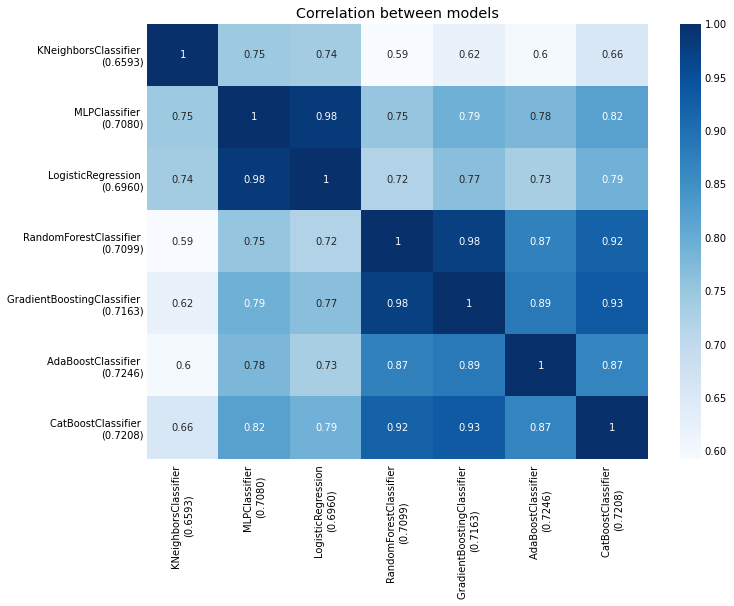

In [46]:
pred_results = []
for name, clf, clf_score in clfs_tuned_norm:
    pred = clf.predict_proba(X_test_norm)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results_norm = pd.concat(pred_results, axis=1)

plt.figure(figsize = (10,8))
g = sns.heatmap(ensemble_results_norm.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [47]:
(ensemble_results_norm.corr().sum()-1)/(ensemble_results_norm.corr().shape[0]-1)

KNeighborsClassifier \n(0.6593)          0.660093
MLPClassifier \n(0.7080)                 0.812432
LogisticRegression \n(0.6960)            0.789228
RandomForestClassifier \n(0.7099)        0.806540
GradientBoostingClassifier \n(0.7163)    0.829547
AdaBoostClassifier \n(0.7246)            0.790259
CatBoostClassifier \n(0.7208)            0.831783
dtype: float64

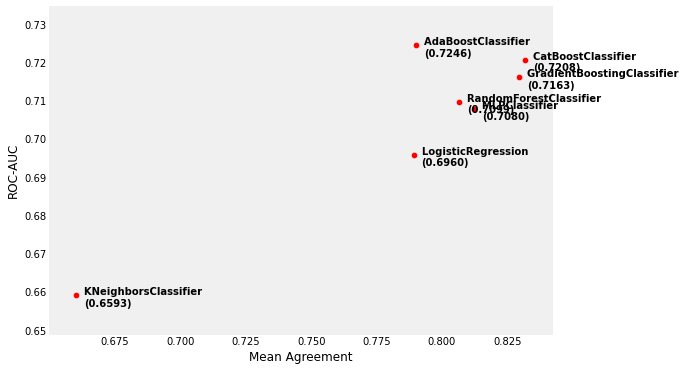

In [48]:
corr = (ensemble_results_norm.corr().sum()-1)/(ensemble_results_norm.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

### Standarized data

In [ ]:
pred_results = []
for name, clf, clf_score in clfs_tuned_stand:
    pred = clf.predict_proba(X_test_norm)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results_stand = pd.concat(pred_results, axis=1)

plt.figure(figsize = (10,8))
g = sns.heatmap(ensemble_results_stand.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [ ]:
(ensemble_results_stand.corr().sum()-1)/(ensemble_results_stand.corr().shape[0]-1)

In [ ]:
corr = (ensemble_results_stand.corr().sum()-1)/(ensemble_results_stand.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

### Poweful transformation data

In [ ]:
pred_results = []
for name, clf, clf_score in clfs_tuned_po:
    pred = clf.predict_proba(X_test_po)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results_po = pd.concat(pred_results, axis=1)

plt.figure(figsize = (10,8))
g = sns.heatmap(ensemble_results_po.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [ ]:
(ensemble_results_po.corr().sum()-1)/(ensemble_results_po.corr().shape[0]-1)

In [ ]:
corr = (ensemble_results_po.corr().sum()-1)/(ensemble_results_po.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

## Averaging voting

각 Data에 대한 Averaging voting

### Normal data

In [ ]:

selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    #'CatboostClassifier' does not improve the score
]
models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [ ]:
max_score = 0
for p in tqdm([0, 1, 2.56]):  
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_test)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_test)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_test, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

### Normalized data

In [49]:
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    'CatboostClassifier'
]
models_for_ensemble = [clf for clf in clfs_tuned_norm if clf[0] in selected]

In [50]:
max_score = 0
for p in tqdm([0, 1, 2.56]):  
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_test_norm)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_test_norm)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_test_norm, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

100%|██████████| 3/3 [00:07<00:00,  2.40s/it]

p=2.56
MLPClassifier●RandomForestClassifier●GradientBoostingClassifier
0.7238326006709438


### Standarized data

In [ ]:
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    'CatboostClassifier'
]
models_for_ensemble = [clf for clf in clfs_tuned_stand if clf[0] in selected]

In [ ]:
max_score = 0
for p in tqdm([0, 1, 2.56]):  
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_test_stand)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_test_stand)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_test_stand, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

### Powerful transformation data

In [ ]:
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    'CatboostClassifier'
]
models_for_ensemble = [clf for clf in clfs_tuned_po if clf[0] in selected]

In [ ]:
max_score = 0
for p in tqdm([0, 1, 2.56]):  
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_test_po)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_test_po)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_test_po, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

In [ ]:
class AveragingClassifier(ClassifierMixin):
    def __init__(self, estimators, p):
        self.estimators = estimators
        self.p = p
    
    def fit(self, X, y):
        return None

    def predict(self, X):
        if self.p == 0:
            pred = gmean([clf.predict(X) for name, clf in estimators], axis=0)
        else:
            preds = [clf.predict(X) for name, clf in estimators]
            pred = (np.sum(np.array(preds)**self.p, axis=0) / len(estimators))**(1/self.p)
        return pred
         
    def predict_proba(self, X):
        if self.p == 0:
            prob = gmean([clf.predict_proba(X) for name, clf in estimators], axis=0)
        else:
            probs = [clf.predict_proba(X) for name, clf in estimators]
            prob = (np.sum(np.array(probs)**self.p, axis=0) / len(estimators))**(1/self.p)
        return prob
    
estimators = [(name, clf) for name, clf, _ in models]
avg_clf = AveragingClassifier(estimators, p)
avg_clf.fit(X_train, y_train)   

In [51]:
class AveragingClassifier(ClassifierMixin):
    def __init__(self, estimators, p):
        self.estimators = estimators
        self.p = p
    
    def fit(self, X, y):
        return None

    def predict(self, X):
        if self.p == 0:
            pred = gmean([clf.predict(X) for name, clf in estimators], axis=0)
        else:
            preds = [clf.predict(X) for name, clf in estimators]
            pred = (np.sum(np.array(preds)**self.p, axis=0) / len(estimators))**(1/self.p)
        return pred
         
    def predict_proba(self, X):
        if self.p == 0:
            prob = gmean([clf.predict_proba(X) for name, clf in estimators], axis=0)
        else:
            probs = [clf.predict_proba(X) for name, clf in estimators]
            prob = (np.sum(np.array(probs)**self.p, axis=0) / len(estimators))**(1/self.p)
        return prob
    
estimators = [(name, clf) for name, clf, _ in models]
avg_clf_norm = AveragingClassifier(estimators, p)
avg_clf_norm.fit(X_train_norm, y_train_norm)   

In [ ]:
class AveragingClassifier(ClassifierMixin):
    def __init__(self, estimators, p):
        self.estimators = estimators
        self.p = p
    
    def fit(self, X, y):
        return None

    def predict(self, X):
        if self.p == 0:
            pred = gmean([clf.predict(X) for name, clf in estimators], axis=0)
        else:
            preds = [clf.predict(X) for name, clf in estimators]
            pred = (np.sum(np.array(preds)**self.p, axis=0) / len(estimators))**(1/self.p)
        return pred
         
    def predict_proba(self, X):
        if self.p == 0:
            prob = gmean([clf.predict_proba(X) for name, clf in estimators], axis=0)
        else:
            probs = [clf.predict_proba(X) for name, clf in estimators]
            prob = (np.sum(np.array(probs)**self.p, axis=0) / len(estimators))**(1/self.p)
        return prob
    
estimators = [(name, clf) for name, clf, _ in models]
avg_clf_stand = AveragingClassifier(estimators, p)
avg_clf_stand.fit(X_train_stand, y_train_stand)   

# 각 Data에 대한 2-Layer stacking 

### Normal data

In [ ]:
selected1 = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned if name in selected1]
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30), cv=3)

stk_clf.fit(X_train, y_train)
print(roc_auc_score(y_test, stk_clf.predict_proba(X_test)[:,1]))  

### Normalized data

In [ ]:
selected1 = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    'CatboostClassifier'
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned_norm if name in selected1]
stk_clf_norm = StackingClassifier(
    estimators=estimators, final_estimator = RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30), cv=3)

stk_clf_norm.fit(X_train_norm, y_train_norm)
print(roc_auc_score(y_test_norm, stk_clf.predict_proba(X_test_norm)[:,1]))  

### Standarized data

In [ ]:
selected1 = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned_stand if name in selected1]
stk_clf_stand = StackingClassifier(
    estimators=estimators, final_estimator= RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30), cv=3)

stk_clf_stand.fit(X_train_stand, y_train_stand)
print(roc_auc_score(y_test_stand, stk_clf.predict_proba(X_test_stand)[:,1]))  

### Powerful transformation data

In [ ]:
selected1 = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
    
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned_po if name in selected1]
stk_clf_po = StackingClassifier(
    estimators=estimators, final_estimator= RandomForestClassifier(random_state=0, max_depth = 6, max_leaf_nodes = 30), cv=3)

stk_clf_po.fit(X_train_po, y_train_po)
print(roc_auc_score(y_test_po, stk_clf.predict_proba(X_test_po)[:,1]))  

# 7. **Deployment**

In [53]:
pd.DataFrame({'cust_id': test_id ,'gender': avg_clf_norm.predict_proba(X_test_norm)[:,1]}).to_csv('송한솔-submit-1.csv', index=False)


#pd.DataFrame({'cust_id': , 'gender': avg_clf_norm.predict_proba(X_test_norm)[:,1]}).to_csv('송한솔-submit-2.csv', index=False)


# pd.DataFrame({'cust_id': test_id, 'gender': stk_clf.predict_proba(X_test_norm)[:,1]}).to_csv('송한솔-submit-3.csv', index=False)

ValueError: array length 1050 does not match index length 2482

# End